<a href="https://colab.research.google.com/github/Jum-eng/MLP-BPSO-PSO-using-Hungarian-dataset/blob/main/MLP_BPSO_PSO_for_HDP_using_Hungarian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install keras

Importing Libraries

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# **Stage 1**

Data Loading

In [ ]:
df = pd.read_csv('/content/Hungarian Heart Disease Dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


Data Cleaning

In [ ]:
# Checking for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,606.0,54.366337,9.074592,29.0,47.25,55.0,61.00,77.0
sex,606.0,0.683168,0.465626,0.0,0.00,1.0,1.00,1.0
cp,606.0,0.966997,1.031199,0.0,0.00,1.0,2.00,3.0
trestbps,606.0,131.623762,17.523642,94.0,120.00,130.0,140.00,200.0
chol,606.0,246.264026,51.787898,126.0,211.00,240.0,274.75,564.0
fbs,606.0,0.148515,0.355903,0.0,0.00,0.0,0.00,1.0
restecg,606.0,0.528053,0.525425,0.0,0.00,1.0,1.00,2.0
thalach,606.0,149.646865,22.886223,71.0,133.25,153.0,166.00,202.0
exang,606.0,0.326733,0.469406,0.0,0.00,0.0,1.00,1.0
oldpeak,606.0,1.039604,1.160115,0.0,0.00,0.8,1.60,6.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5   fbs       606 non-null    int64  
 6   restecg   606 non-null    int64  
 7   thalach   606 non-null    int64  
 8   exang     606 non-null    int64  
 9   oldpeak   606 non-null    float64
 10  slope     606 non-null    int64  
 11  ca        606 non-null    int64  
 12  thal      606 non-null    int64  
 13  target    606 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 66.4 KB


In [ ]:
df.shape

(606, 14)

Feature and target Assignment

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

Data Normalization

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split data into train/val/test split

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **Stage 2**

Model Design

In [ ]:
def build_model(input_shape, learning_rate=0.001, neurons_layer1=64, neurons_layer2=32, dropout1=0.3, dropout2=0.3):
    model = Sequential()

    # Input Layer
    model.add(Input(shape=(input_shape,)))

    # First Dense Layer
    model.add(Dense(neurons_layer1, activation='relu'))
    model.add(Dropout(dropout1))

    # Second Dense Layer
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dropout(dropout2))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model
model = build_model(input_shape=13)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

# **Stage 3**

# PSO - Particles Swarm Optimization

In [ ]:
param_bounds = {
    'learning_rate': [0.0001, 0.01],
    'neurons_layer1': [32, 128],
    'neurons_layer2': [16, 64],
    'dropout1': [0.2, 0.5],
    'dropout2': [0.2, 0.5],
    'batch_size': [16, 64]
}

def sample_from_bounds(bounds, is_int=False):
    if is_int:
        return random.randint(bounds[0], bounds[1])
    else:
        return random.uniform(bounds[0], bounds[1])

Fitness Function

In [ ]:
def fitness_function(hyperparams, X_train, y_train, X_val, y_val):
    lr, n1, n2, d1, d2, batch_size = hyperparams
    n1, n2 = int(n1), int(n2)
    batch_size = int(batch_size)

    try:
        model = build_model(input_shape=X_train.shape[1],
                                learning_rate=lr,
                                neurons_layer1=n1,
                                neurons_layer2=n2,
                                dropout1=d1,
                                dropout2=d2)

        history = model.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=75,
                            batch_size=batch_size,
                            verbose=0)

        val_acc = history.history['val_accuracy'][-1]
        return -val_acc , model
    except:
        return 1.0, None

In [ ]:
def fitness_with_given_params(feature_mask, params, X_train, y_train, X_val, y_val):
    if np.sum(feature_mask) == 0:
        return 1.0, []  # Avoid training on no features

    selected_features = [i for i, bit in enumerate(feature_mask) if bit == 1]
    X_train_selected = X_train[:, selected_features]
    X_val_selected = X_val[:, selected_features]

    model = build_model(
        input_shape=X_train_selected.shape[1],
        learning_rate=params['learning_rate'],
        neurons_layer1=params['neurons_layer1'],
        neurons_layer2=params['neurons_layer2'],
        dropout1=params['dropout1'],
        dropout2=params['dropout2']
    )

    model.fit(
        X_train_selected, y_train,
        epochs=75,
        batch_size=params['batch_size'],
        verbose=0
    )

    val_loss, val_accuracy = model.evaluate(X_val_selected, y_val, verbose=0)
    return -val_accuracy, selected_features, model  # Minimize negative accuracy

In [ ]:
def feature_selection_bpso(X_train_full, y_train, X_val_full, y_val, params, n_particles=3, max_iter=3):
    n_features = X_train_full.shape[1]
    particles = [np.random.randint(0, 2, n_features) for _ in range(n_particles)]
    velocities = [np.random.uniform(-1, 1, n_features) for _ in range(n_particles)]

    # Initialize personal bests
    pbest_positions = [p.copy() for p in particles]  # Make proper copies
    pbest_scores = []
    pbest_models = []  # Store model for each particle

    # Calculate initial fitness for all particles
    for i in range(n_particles):
        score, _, model = fitness_with_given_params(particles[i], params, X_train_full, y_train, X_val_full, y_val)
        pbest_scores.append(score)
        pbest_models.append(model)

    # Initialize global best
    gbest_index = np.argmin(pbest_scores)
    gbest_position = pbest_positions[gbest_index].copy()
    gbest_score = pbest_scores[gbest_index]
    gbest_model = pbest_models[gbest_index]

    for iter in range(max_iter):
        for i in range(n_particles):
            r1 = np.random.rand(n_features)
            r2 = np.random.rand(n_features)

            # Update velocity
            velocities[i] = (
                0.7 * velocities[i] +
                1.5 * r1 * (pbest_positions[i] - particles[i]) +
                1.5 * r2 * (gbest_position - particles[i])
            )

            # Update position using sigmoid
            sigmoid = lambda x: 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow
            prob = sigmoid(velocities[i])
            particles[i] = np.array([1 if np.random.random() < p else 0 for p in prob])

            # Evaluate fitness
            score, selected_features, model = fitness_with_given_params(particles[i], params, X_train_full, y_train, X_val_full, y_val)

            # Update personal best
            if score < pbest_scores[i]:
                pbest_scores[i] = score
                pbest_positions[i] = particles[i].copy()
                pbest_models[i] = model

            # Update global best
            if score < gbest_score:
                gbest_score = score
                gbest_position = particles[i].copy()
                gbest_model = model

    selected_indices = [i for i, bit in enumerate(gbest_position) if bit == 1]
    return gbest_score, selected_indices, gbest_model


def pso_optimize(X_train, y_train, X_val, y_val, param_bounds, pop_size=5, max_iter=5):
    dim = len(param_bounds)
    keys = list(param_bounds.keys())
    lb = np.array([v[0] for v in param_bounds.values()])
    ub = np.array([v[1] for v in param_bounds.values()])

    w = 0.7
    c1 = 1.5
    c2 = 1.5

    # Initialize population and velocities
    population = [np.random.uniform(lb, ub) for _ in range(pop_size)]
    velocities = [np.random.uniform(-1, 1, dim) for _ in range(pop_size)]

    # Initialize personal bests
    pbest_positions = [p.copy() for p in population]
    pbest_scores = []

    # Calculate initial fitness for all particles
    for i in range(pop_size):
        score, _ = fitness_function(population[i], X_train, y_train, X_val, y_val)
        pbest_scores.append(score)

    # Initialize global best
    gbest_index = np.argmin(pbest_scores)
    gbest_position = pbest_positions[gbest_index].copy()
    gbest_score = pbest_scores[gbest_index]

    best_overall_score = 1.0
    best_overall_params = None
    best_overall_features = []
    best_overall_model = None

    for iter in range(max_iter):
        print(f"PSO Iteration {iter + 1}/{max_iter}")

        for i in range(pop_size):
            r1 = np.random.rand(dim)
            r2 = np.random.rand(dim)

            # Fixed velocity update
            velocities[i] = (
                w * velocities[i] +
                c1 * r1 * (pbest_positions[i] - population[i]) +  # Fixed: use pbest_positions
                c2 * r2 * (gbest_position - population[i])
            )

            # Update position
            population[i] = population[i] + velocities[i]
            population[i] = np.clip(population[i], lb, ub)

            # Convert to integer parameters where needed
            params = dict(zip(keys, population[i]))
            params['neurons_layer1'] = int(params['neurons_layer1'])
            params['neurons_layer2'] = int(params['neurons_layer2'])
            params['batch_size'] = int(params['batch_size'])

            # Evaluate fitness (hyperparameter optimization)
            score, model = fitness_function(population[i], X_train, y_train, X_val, y_val)

            # Update personal best
            if score < pbest_scores[i]:
                pbest_scores[i] = score
                pbest_positions[i] = population[i].copy()

            # Update global best
            if score < gbest_score:
                gbest_score = score
                gbest_position = population[i].copy()

            # Feature selection using BPSO with current best hyperparameters
            feature_score, selected_features, feature_model = feature_selection_bpso(
                X_train, y_train, X_val, y_val, params
            )

            # Update overall best if this combination is better
            if feature_score < best_overall_score:
                best_overall_score = feature_score
                best_overall_params = params.copy()
                best_overall_features = selected_features.copy()
                best_overall_model = feature_model

        print(f"  -> Best Score So Far: {-best_overall_score:.4f}")

    print("\nBest Parameters:", best_overall_params)
    print("Best Features:", best_overall_features)
    print(f"Best Validation Accuracy: {-best_overall_score:.4f}")

    return best_overall_params, best_overall_features, best_overall_model

In [ ]:
best_params, best_overall_features,best_overall_model  = pso_optimize(X_train, y_train, X_val, y_val, param_bounds, pop_size=10, max_iter=10)

PSO Iteration 1/10
  -> Best Score So Far: 0.9451
PSO Iteration 2/10
  -> Best Score So Far: 0.9451
PSO Iteration 3/10
  -> Best Score So Far: 0.9451
PSO Iteration 4/10
  -> Best Score So Far: 0.9560
PSO Iteration 5/10
  -> Best Score So Far: 0.9560
PSO Iteration 6/10
  -> Best Score So Far: 0.9560
PSO Iteration 7/10
  -> Best Score So Far: 0.9560
PSO Iteration 8/10
  -> Best Score So Far: 0.9670
PSO Iteration 9/10
  -> Best Score So Far: 0.9670
PSO Iteration 10/10
  -> Best Score So Far: 0.9670

Best Parameters: {'learning_rate': np.float64(0.01), 'neurons_layer1': 67, 'neurons_layer2': 64, 'dropout1': np.float64(0.20151705383144639), 'dropout2': np.float64(0.267649996171756), 'batch_size': 16}
Best Features: [1, 2, 3, 4, 5, 6, 7, 8, 11]
Best Validation Accuracy: 0.9670


[1, 2, 3, 4, 5, 6, 7, 8, 11]


Model: "sequential_1017"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3051 (Dense)              │ (None, 67)             │           670 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2034 (Dropout)          │ (None, 67)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3052 (Dense)              │ (None, 64)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2035 (Dropout)          │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3053 (Dense)              │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,263 (59.62 KB)

 Trainable params: 5,087 (19.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,176 (39.75 KB)

model input shape:  (None, 9)

Final Validation Accuracy: 0.9670
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.94      1.00      0.97        48

    accuracy                           0.97        91
   macro avg       0.97      0.97      0.97        91
weighted avg       0.97      0.97      0.97        91



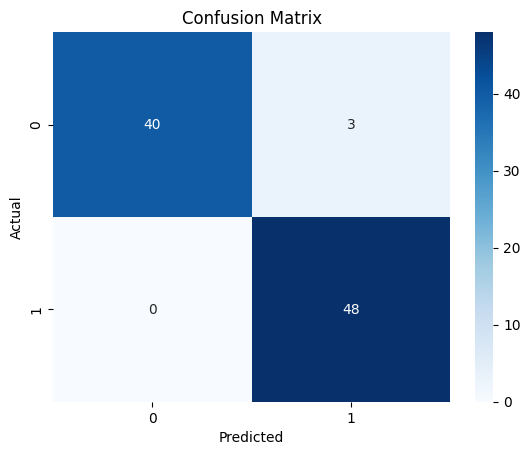


 Final Test Accuracy: 0.9341
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        39
           1       0.96      0.92      0.94        52

    accuracy                           0.93        91
   macro avg       0.93      0.94      0.93        91
weighted avg       0.94      0.93      0.93        91



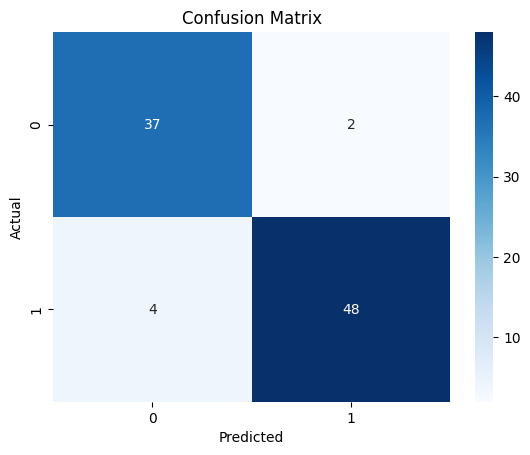

In [ ]:
# Select only the BPSO-selected features from the original splits
print(best_overall_features)

new_X_train = X_train[:, best_overall_features]
new_X_val   = X_val[:, best_overall_features]
new_X_test  = X_test[:, best_overall_features]

final_model = best_overall_model

final_model.summary()
print('model input shape: ',final_model.input_shape)

# Evaluate on validation set
val_loss, val_accuracy = final_model.evaluate(new_X_val, y_val, verbose=0)
print(f"\n Final Validation Accuracy: {val_accuracy:.4f}")

# Generate classification report
y_pred_probs = final_model.predict(new_X_val)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n Classification Report:\n", classification_report( y_val, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix( y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluate on test set
test_loss, test_accuracy = final_model.evaluate(new_X_test, y_test, verbose=0)
print(f"\n Final Test Accuracy: {test_accuracy:.4f}")

# Generate classification report
y_pred_probs = final_model.predict(new_X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ROC AUC Score: 0.9561


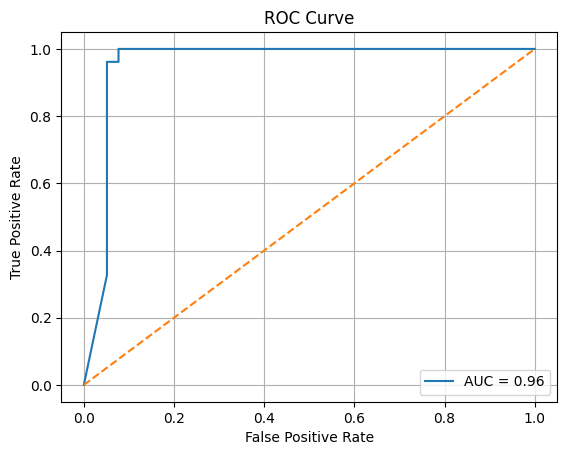

In [ ]:
# ROC AUC
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"ROC AUC Score: {auc_score:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()